# Malware Detection using Deep Learning

This notebook aims to build a **Convolutional Neural Network** model to perform a **Detection** of Malwares from the **Malimg Dataset**.

# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Preprocessing - Converting to images

Raw malwares will be stored in the following folder:

In [1]:
root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4\\MalwareDetection\\malimg_dataset\\train\dataset_9010\\malimg_dataset\\train\\"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

files :  ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.gen!g', 'C2LOP.P', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


# Preprocessing - Generate the dataset

Here is our new folder :

In [3]:
path_root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4\\MalwareDetection\\malimg_dataset\\train\\dataset_9010\\malimg_dataset\\train\\"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : (64*64) images.
  * **batch_size** : Is the size of the batch we will use.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 8404 images belonging to 25 classes.


In [5]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [6]:
imgs, labels = next(batches)

As you can see, our images are in with shape 64x64 [width x length x depth].

In [7]:
imgs.shape

(8404, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [8]:
labels.shape

(8404, 25)

The following method allows us to plot a sample of images in our dataset.

In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

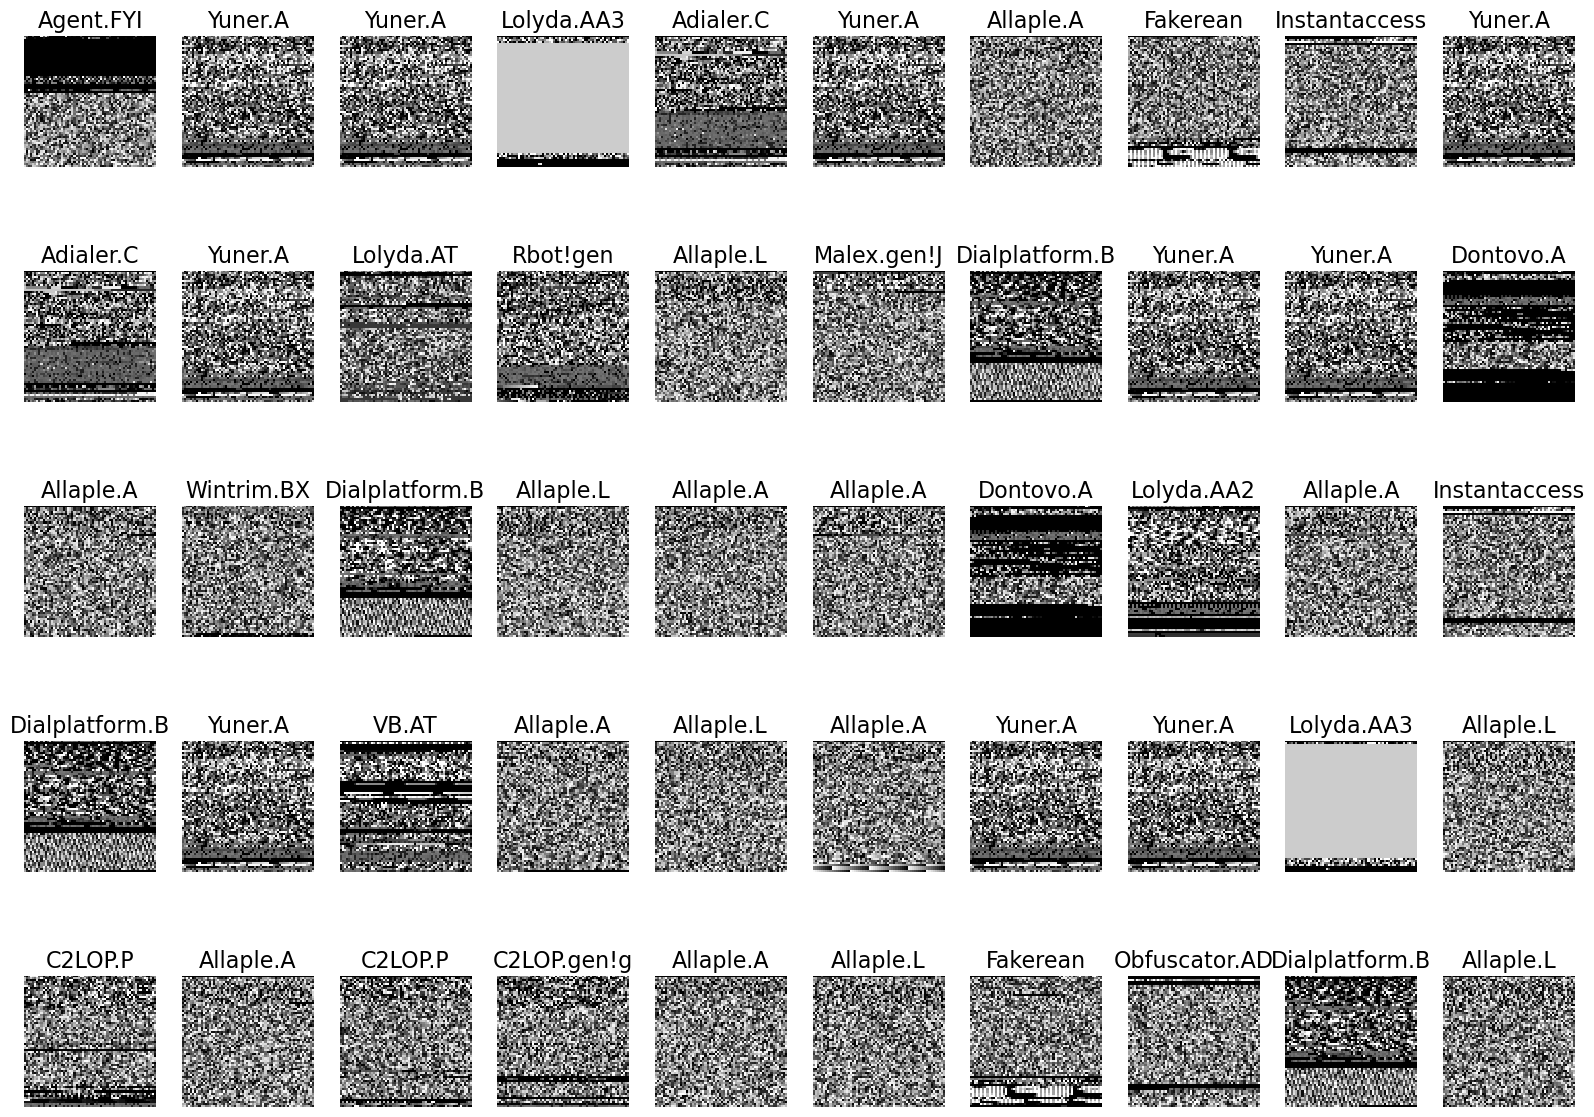

In [10]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [11]:
classes = batches.class_indices.keys()

In [12]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

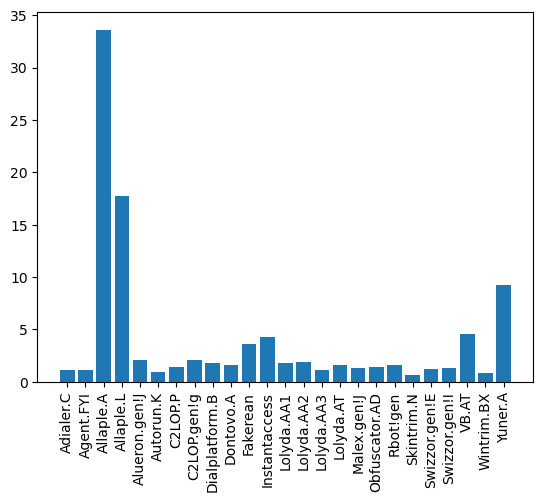

In [13]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

# Train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [15]:
X_train.shape

(5882, 64, 64, 3)

In [16]:
X_test.shape

(2522, 64, 64, 3)

In [17]:
y_train.shape

(5882, 25)

In [18]:
y_test.shape

(2522, 25)

# Convolutional Neural Network Model

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [19]:
import tensorflow.keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

We want **25** classes as output.

In [20]:
num_classes = 25

Building the model

In [21]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [22]:
Malware_model = malware_model()

In [23]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [24]:
y_train.shape

(5882, 25)

In [25]:
y_train_new = np.argmax(y_train, axis=1)

In [26]:
y_train_new

array([ 2,  2,  6, ...,  3, 24,  2], dtype=int64)

In [27]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                                    class_weight = 'balanced',
                                                    classes = np.unique(y_train_new),
                                                    y = y_train_new
                                                )

In [28]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

Malware_model.fit((X_train), (y_train), epochs=10, validation_data=(X_test, y_test))    

Epoch 1/10
184/184 [==============================] - 10s 48ms/step - loss: 1.7716 - accuracy: 0.4646 - val_loss: 1.0133 - val_accuracy: 0.7260
Epoch 2/10
184/184 [==============================] - 9s 52ms/step - loss: 0.8903 - accuracy: 0.6996 - val_loss: 0.5383 - val_accuracy: 0.8505
Epoch 3/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5764 - accuracy: 0.8220 - val_loss: 0.3105 - val_accuracy: 0.9056
Epoch 4/10
184/184 [==============================] - 7s 41ms/step - loss: 0.3833 - accuracy: 0.8827 - val_loss: 0.2161 - val_accuracy: 0.9381
Epoch 5/10
184/184 [==============================] - 9s 51ms/step - loss: 0.3119 - accuracy: 0.9048 - val_loss: 0.2002 - val_accuracy: 0.9358
Epoch 6/10
184/184 [==============================] - 8s 46ms/step - loss: 0.2559 - accuracy: 0.9174 - val_loss: 0.1758 - val_accuracy: 0.9445
Epoch 7/10
184/184 [==============================] - 9s 48ms/step - loss: 0.2132 - accuracy: 0.9328 - val_loss: 0.1485 - val_accuracy: 0.954

In [29]:
scores = Malware_model.evaluate(X_test, y_test)

79/79 [==============================] - 1s 11ms/step - loss: 0.1311 - accuracy: 0.9576


In [30]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9575733542442322


# Confusion Matrix

In [31]:
import numpy as np
import pandas as pd

In [32]:
y_pred = np.argmax( Malware_model.predict(X_test, verbose=0), axis = 1)

In [33]:
y_pred

array([2, 3, 3, ..., 2, 2, 7], dtype=int64)

In [34]:
y_test2 = np.argmax(y_test, axis=1)

In [35]:
y_test2

array([2, 3, 3, ..., 2, 2, 7], dtype=int64)

In [36]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [37]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

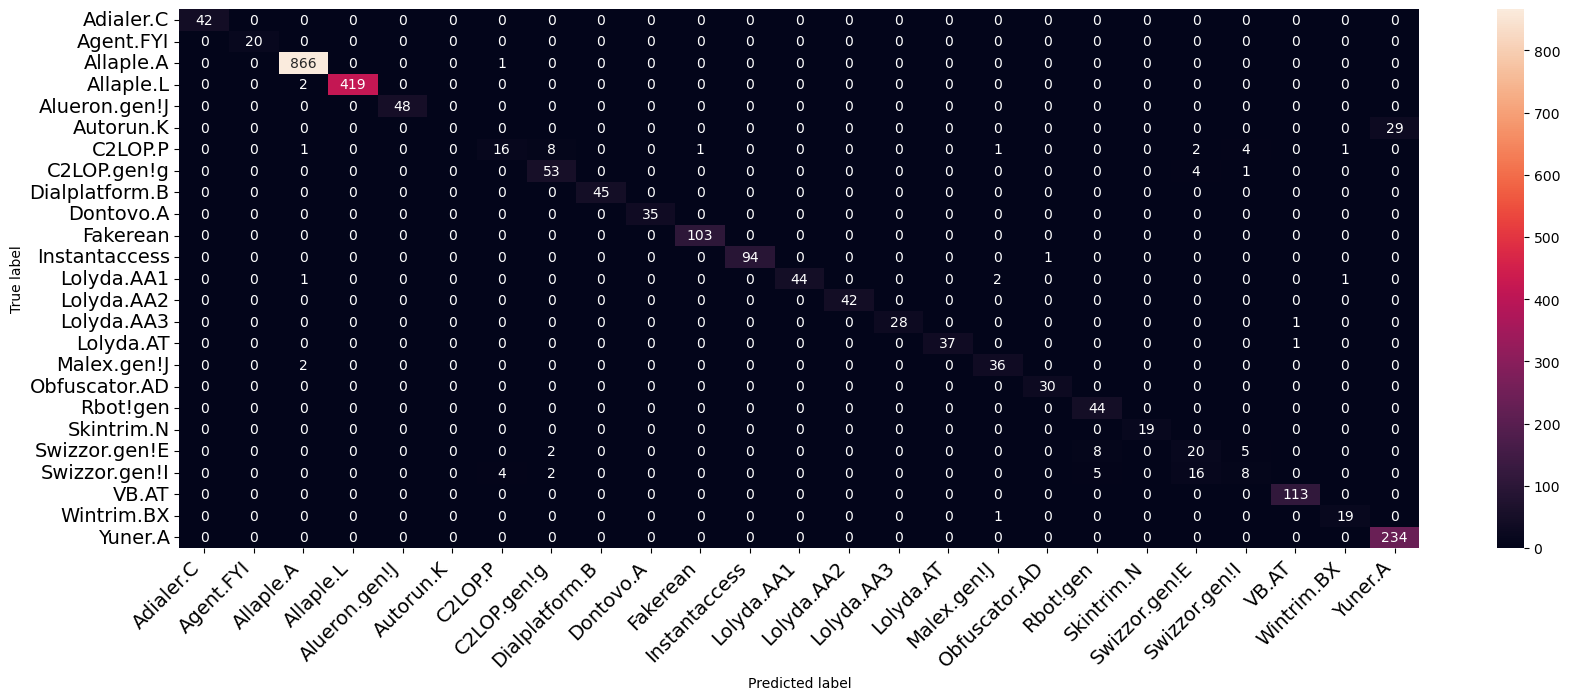

In [38]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)